### Visualizations
Metadata Neighborhood Tabulation Areas (NTAs) were created to project populations at a small area level, from 2000 to 2030 for PlaNYC, the long-term sustainability plan for New York City. Since population size affects the error associated with population projections, these geographic units needed to have a minimum population, which we determined to be 15,000. This criterion resulted in combinations of neighborhoods that probably would not occur if one were solely designating boundaries of historical neighborhoods. Moreover, the neighborhood names associated with the neighborhood tabulation areas are not intended to be definitive. Another feature of the sustainability plan, was the creation of projections for Public Use Microdata Areas (PUMAs), which are approximations of New York City’s Community Districts developed for use with the Census Bureau’s Public Use Microdata Samples (PUMS). In order to make the boundaries consistent with PUMAs, NTAs were created using whole census tracts, from the 2010 census, within PUMAs. Since NTAs were not permitted to cross PUMA boundaries, this further restricted our ability to identify what may be thought of as historical neighborhood boundaries. Thus, users need to be cognizant of the reason why NTAs were created and the demographic/geographic constraints inherent in how they were configured. Despite these limitations, NTAs are a valuable summary level for use with both the 2010 Census and the American Community Survey (ACS). Regarding the decennial census, these geographic areas offer a good compromise between the very detailed data for census tracts (2,168) and the broad strokes provided by community districts (59). For the ACS, NTAs offer a statistically reliable alternative to the high sampling error that renders data for most individual census tracts unusable.

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd

In [3]:
# https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
# https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz
map_df = gpd.read_file("./geo_export_ed304d49-3aaf-4cbd-9c75-28380a34d7c6.shp")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,shape_area,ntacode,ntaname,shape_leng,countyfips,borocode,boroname,geometry
0,3.579964e+07,BK43,Midwood,27996.591274,047,3.0,Brooklyn,POLYGON ((-73.94732672160586 40.62916656720947...
1,3.262983e+07,BK75,Bedford,29992.919174,047,3.0,Brooklyn,POLYGON ((-73.94193078816201 40.70072523469552...
2,6.307284e+06,BX40,Fordham South,15878.272921,005,2.0,Bronx,POLYGON ((-73.89138023380268 40.86170058826308...
3,5.400502e+07,BK88,Borough Park,39247.227722,047,3.0,Brooklyn,"POLYGON ((-73.9760493559142 40.63127590564666,..."
4,3.270695e+07,BK96,Rugby-Remsen Village,30957.853395,047,3.0,Brooklyn,POLYGON ((-73.90855790522774 40.65209593779453...


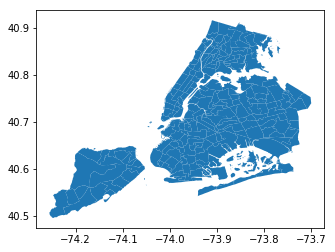

In [4]:
map_df.plot()

In [57]:
df = pd.read_csv('./unified2.csv')
# df = df.iloc[1:]
# df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,nta,TotalPop,NYCHAperc,PreventHosp,DiversityScore,HealthIns,c_Water System,Water System_unresolved_case,...,c_Hazardous Materials,Hazardous Materials_unresolved_case,c_Rodent,Rodent_count_overtime,Rodent_unresolved_case,Rodent_processing_time,Rodent_overtime,c_Water Quality,c_Drinking,Drinking_processing_time
0,0,1,BK09,23532,0.0,668.9,85.762171,93.0,36,0,...,5.0,0.0,13.0,3.0,2.0,14.001044,-5.492755,2.0,NaN,NaN
1,1,2,BK17,63459,7.6,1631.2,99.708174,92.8,155,2,...,10.0,0.0,46.0,4.0,9.0,22.770472,-135.965376,5.0,NaN,NaN
2,2,3,BK19,33146,0.0,1233.8,62.074230,88.0,58,0,...,4.0,0.0,26.0,1.0,1.0,10.357777,-50.132442,2.0,1.0,0.035012
3,3,4,BK21,29229,30.7,3158.7,118.602319,91.1,54,2,...,9.0,0.0,14.0,5.0,1.0,16.860710,-10.040810,1.0,2.0,NaN
4,4,5,BK23,14977,0.0,1233.9,91.417121,92.6,10,0,...,2.0,1.0,3.0,1.0,0.0,19.786173,-23.554248,NaN,NaN,NaN


In [58]:
# # df = df[['NTA_Code','PreventHosp']]
# df = df[['nta_code', 'median_income','mean_income']]

# df

min_hosp = df['c_Rodent'].min()
max_hosp = df['c_Rodent'].max()
print(min_hosp, max_hosp)
print(df.columns)

2.0 195.0
Index(['Unnamed: 0', 'Unnamed: 0.1', 'nta', 'TotalPop', 'NYCHAperc',
       'PreventHosp', 'DiversityScore', 'HealthIns', 'c_Water System',
       'Water System_unresolved_case', 'c_Sanitation Condition',
       'c_Air Quality', 'c_Food Establishment',
       'Food Establishment_count_overtime',
       'Food Establishment_unresolved_case',
       'Food Establishment_processing_time', 'Food Establishment_overtime',
       'c_Indoor Air Quality', 'Indoor Air Quality_count_overtime',
       'Indoor Air Quality_unresolved_case',
       'Indoor Air Quality_processing_time', 'Indoor Air Quality_overtime',
       'c_Smoking', 'Smoking_unresolved_case', 'Smoking_processing_time',
       'c_Dirty Conditions', 'c_Food Poisoning',
       'Food Poisoning_unresolved_case', 'Food Poisoning_processing_time',
       'c_Asbestos', 'Asbestos_unresolved_case', 'c_Hazardous Materials',
       'Hazardous Materials_unresolved_case', 'c_Rodent',
       'Rodent_count_overtime', 'Rodent_unresolved_ca

In [59]:
merged = map_df.set_index('ntacode').join(df.set_index('nta'))
merged =merged.replace(np.nan, 0) 
merged = merged.loc[merged['c_Rodent'] != 0]
merged = merged.reset_index()
merged


,ntacode,shape_area,ntaname,shape_leng,countyfips,borocode,boroname,geometry,Unnamed: 0,Unnamed: 0.1,...,c_Hazardous Materials,Hazardous Materials_unresolved_case,c_Rodent,Rodent_count_overtime,Rodent_unresolved_case,Rodent_processing_time,Rodent_overtime,c_Water Quality,c_Drinking,Drinking_processing_time
0,BK43,3.579964e+07,Midwood,27996.591274,047,3.0,Brooklyn,POLYGON ((-73.94732672160586 40.62916656720947...,21.0,22.0,...,25.0,0.0,62.0,16.0,9.0,7.793565,-5.706887,2.0,3.0,0.313935
1,BK75,3.262983e+07,Bedford,29992.919174,047,3.0,Brooklyn,POLYGON ((-73.94193078816201 40.70072523469552...,35.0,36.0,...,7.0,0.0,116.0,13.0,9.0,14.798833,-22.353099,3.0,2.0,0.102980
2,BX40,6.307284e+06,Fordham South,15878.272921,005,2.0,Bronx,POLYGON ((-73.89138023380268 40.86170058826308...,74.0,76.0,...,0.0,0.0,44.0,0.0,25.0,3.623367,0.000000,0.0,4.0,0.142575
3,BK88,5.400502e+07,Borough Park,39247.227722,047,3.0,Brooklyn,"POLYGON ((-73.9760493559142 40.63127590564666,...",44.0,45.0,...,5.0,0.0,31.0,2.0,4.0,12.637952,-10.723293,4.0,1.0,0.000000
4,BK96,3.270695e+07,Rugby-Remsen Village,30957.853395,047,3.0,Brooklyn,POLYGON ((-73.90855790522774 40.65209593779453...,49.0,50.0,...,2.0,0.0,69.0,7.0,12.0,11.942372,-23.446632,3.0,4.0,0.229757
5,QN52,2.945438e+07,East Flushing,25843.364956,081,4.0,Queens,POLYGON ((-73.79493246234003 40.75779803007457...,154.0,159.0,...,0.0,0.0,4.0,0.0,1.0,4.883669,0.000000,0.0,1.0,0.069433
6,QN53,3.700132e+07,Woodhaven,28070.585548,081,4.0,Queens,POLYGON ((-73.84913837242911 40.69828274120191...,155.0,160.0,...,3.0,0.0,33.0,0.0,7.0,6.990497,0.000000,1.0,4.0,0.044563
7,BK44,2.737916e+07,Madison,26237.257341,047,3.0,Brooklyn,POLYGON ((-73.93753749374048 40.60855739025754...,22.0,23.0,...,3.0,0.0,22.0,3.0,3.0,10.587238,-8.242049,3.0,3.0,0.080251
8,QN48,3.416422e+07,Auburndale,32446.878673,081,4.0,Queens,POLYGON ((-73.77573836927105 40.74332564716403...,150.0,155.0,...,1.0,0.0,8.0,0.0,0.0,6.125000,0.000000,1.0,0.0,0.000000
9,BX44,3.627356e+07,Williamsbridge-Olinville,27350.973945,005,2.0,Bronx,POLYGON ((-73.84704957988549 40.88767181587945...,77.0,79.0,...,5.0,0.0,57.0,1.0,7.0,8.971174,-2.414838,1.0,2.0,0.017488


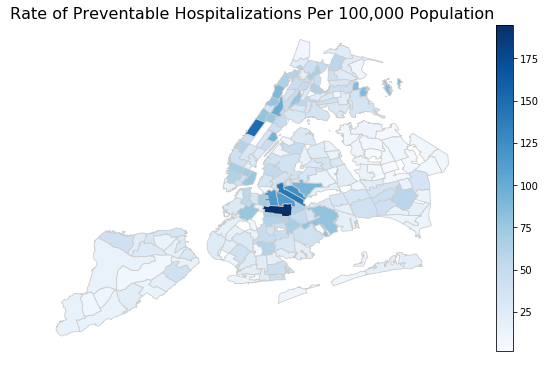

In [60]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'c_Rodent'
# set the range for the choropleth
vmin, vmax = min_hosp, max_hosp
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

ax.set_title('Rate of Preventable Hospitalizations Per 100,000 Population', fontdict={'fontsize': '16', 'fontweight' : '2'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.savefig("map_export.png", dpi=300)

In [ ]:
from shapely.geometry import Point, Polygon
import geopandas

# https://stackoverflow.com/questions/48097742/geopandas-point-in-polygon
def coord_to_ntacode(lat, long, polys):
    pnt = Point(long, lat)
    for i in range(len(polys)):
        if pnt.within(polys['geometry'][i]):
            return polys.loc[i, 'ntacode']
    else:
        return 'null'
    
print(coord_to_ntacode(40.63, -73.93, merged))


service_requests_df = pd.read_csv('./Materials/311_service_requests.csv')
service_requests_df['ntacode'] = ''
service_requests_df['created_date']= pd.to_datetime(service_requests_df['created_date'])
service_requests_df['closed_date']= pd.to_datetime(service_requests_df['closed_date'])
service_requests_df = service_requests_df.loc[service_requests_df['created_date'] > pd.to_datetime('2012',format='%Y')]
service_requests_df = service_requests_df.loc[service_requests_df['created_date'] < pd.to_datetime('2015',format='%Y')]

for i in range(len(service_requests_df)):
    print(i)
    service_requests_df.loc[i, 'ntacode'] = coord_to_ntacode(service_requests_df.loc[i, 'latitude'], service_requests_df.loc[i, 'longitude'], merged)
service_requests_df

In [ ]:
service_requests_df.to_csv('srvice_requests_df.csv')